In [1]:
import warnings
from matplotlib import pyplot
warnings.filterwarnings("ignore")
from summer.utils import ref_times_to_dti
from autumn.core.project import get_project
from autumn.core.project import Project, ParameterSet, load_timeseries, build_rel_path, use_tuned_proposal_sds, get_all_available_scenario_paths
from autumn.core.utils.display import pretty_print
import json
import pandas as pd
from autumn.settings import  BASE_PATH, PROJECTS_PATH
from pathlib import PurePath
from addict import Dict
import sys
from autumn.projects.tuberculosis.kiribati.project import ANALYSIS

In [2]:
pyplot.style.use("ggplot")

In [3]:
project = get_project("tuberculosis","kiribati")

In [4]:
base_params = project.param_set.baseline
sc_models = project.param_set.scenarios

In [5]:
model_0 = project.run_baseline_model(base_params)

In [6]:
base_outdf = model_0.get_derived_outputs_df()

In [7]:
sc_models = project.run_scenario_models(model_0, project.param_set.scenarios)
scenario_dfs = [m.get_derived_outputs_df() for m in sc_models]

In [10]:
# start_times = [
#     sc_params.to_dict()["time"]["start"] for sc_params in sc_params_dict
# ]
# sc_models = project.run_scenario_models(base_model, sc_params_dict, start_times=start_times)
# scenario_dfs = [m.get_derived_outputs_df() for m in sc_models]
# base_stime = base_params['time']['start']

In [8]:
outputs_to_plot = ["population_size", "notifications", "incidence", "cumulative_diseased"]
# plot_end_time = base_params['time']['end']

In [9]:
ts_path = PurePath(BASE_PATH, "autumn", "projects", "tuberculosis", "kiribati", "timeseries.json")
def load_ts(path):
    with open(path, "r") as f:
        data = json.load(f)
    out_dict = Dict(data)
    return out_dict
ts_set = load_ts(ts_path)

In [10]:
out =  [name for name in outputs_to_plot if(len(ts_set[name]['times']))]
for outname in out:
            valname = str(outname)
            if out.index(outname) == 0:
                basedf = pd.DataFrame({'Years':ts_set[outname]['times'], valname:ts_set[outname]['values']})
            else:
                basedf = basedf.merge(pd.DataFrame({'Years':ts_set[outname]['times'], valname:ts_set[outname]['values']}), how = 'outer', on="Years")     
basedf.index = basedf['Years']

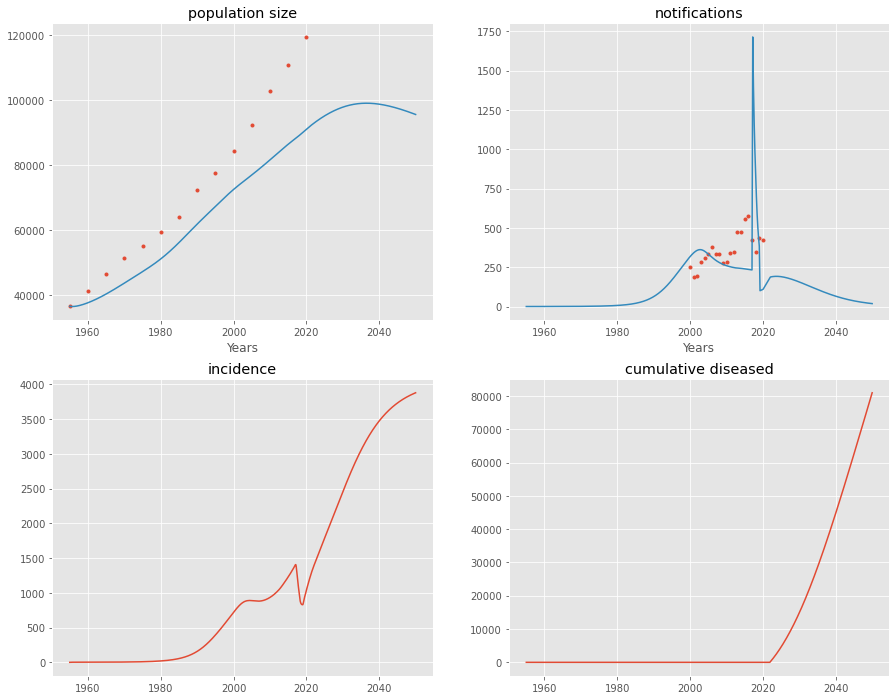

In [11]:
fig = pyplot.figure(figsize=(15, 12))
for i_out, output in enumerate(outputs_to_plot):
    axis = fig.add_subplot(2, 2, i_out + 1)
    if output in out:
        basedf[output].plot(style='.')
    base_outdf[output].plot(label="baseline")
    axis.set_title(output.replace("_", " "))